### Formulas used for sales forecasting



### Intialization of required libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker as tckr
import shutil

print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)
print("Pandas v" + pd.__version__)

sns.set(style="ticks", color_codes=True)
sns.set_style("darkgrid")

TensorFlow v1.10.1
Numpy v1.14.5
Pandas v0.23.4


### Reading of dataset from csv file

In [3]:
df_annual_sales = pd.read_csv('./csv/train/annual_sales.csv')

df_monthly_sales = pd.read_csv('./csv/train/monthly_sales.csv')
df_monthly_sales_count = pd.read_csv('./csv/train/monthly_sales_count.csv')
df_monthly_over_annual_sales = pd.read_csv('./csv/train/monthly_over_annual_sales.csv')
df_combined_monthly_reports = pd.read_csv('./csv/train/combined_monthly_reports.csv')

df_monthly_mean = pd.read_csv('./csv/train/monthly_mean.csv')

### Plotting of annual sales

   BUSINESS_YEAR  ANNUAL_INTEREST
0           2000     1.683847e+10
1           2001     1.684598e+10
2           2002     1.682903e+10
3           2003     1.686503e+10
4           2004     1.683663e+10


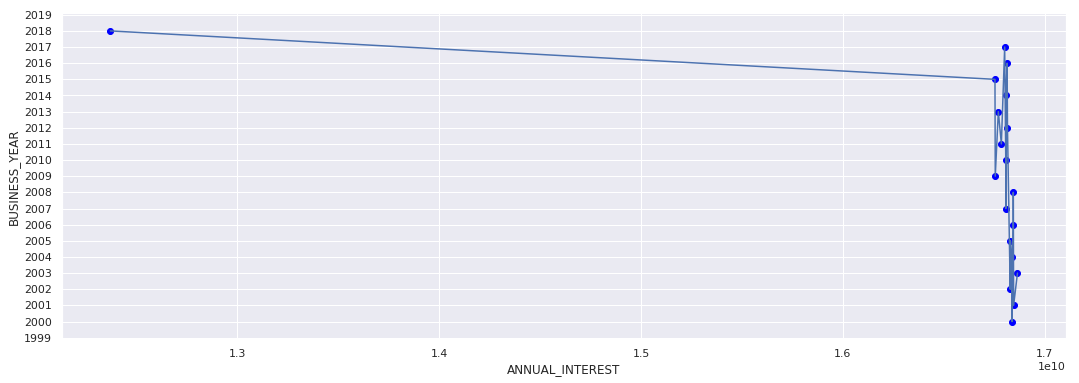

In [12]:
print(df_annual_sales.head())

plt.subplots(figsize=(18, 6))
ax = sns.lineplot(x='BUSINESS_YEAR', y='ANNUAL_INTEREST', data=df_annual_sales)
plt.scatter(df_annual_sales['ANNUAL_INTEREST'], df_annual_sales['BUSINESS_YEAR'], color = 'blue')


ax.yaxis.set_major_locator(tckr.MultipleLocator(1000000000))
ax.xaxis.set_major_locator(tckr.MultipleLocator(1))
ax.xaxis.set_major_formatter(tckr.ScalarFormatter())

In [132]:
# FEATURES = ['business_month', 'business_year']
# TARGET = 'interest'

# columns = list([TARGET])
# columns.extend(FEATURES)

# df_train = pd.read_csv('./csv/sales_train.csv', header = None, names = columns)
# df_valid = pd.read_csv('./csv/sales_eval.csv', header = None, names = columns)
# df_test = pd.read_csv('./csv/sales_test.csv', header = None, names = columns)

## Manual computations

In [133]:
# len_train = len(df_train)
# mean_x = 0

# for i in range(len_train) :
#     mean_x += df_train['interest'][i];
    
# mean_x /= len_train

# print(mean_x)

# mean_y = 0;

# for i in range(len_train) :
#     mean_y += df_train['business_month'][i];
    
# mean_y /= len_train

# print(mean_y)

# slope_m = 0
# xn_mean_x = 0
# yn_mean_x = 0
# a = 0
# b = 0

# for i in range(len_train) :
#     xn_mean_x = (df_train['interest'][i] - mean_x)
#     yn_mean_x = (df_train['business_month'][i] - mean_y)
#     a += xn_mean_x * yn_mean_x
#     b += xn_mean_x * xn_mean_x
    
# slope_m = a/b

# print(slope_m)

# intercept_y = mean_y - (slope_m * mean_x)

# print(intercept_y)

# def linear_equation(x) :
#     return slope_m * x + intercept_y

# print(linear_equation(12))

29998.421242814067
6.41485700843017
3.62416632559581e-08
6.413769815749277
6.413770250649236


## Plotting of datasets

In [156]:
# # plot_train = sns.regplot(x = "business_month", y = "interest", ci = None, truncate = True, data = df_train)

# train_x = df_train['business_month'].values[:, np.newaxis]
# train_y = df_train['interest'].values

# plt.scatter(train_x, train_y, color = 'b')


# predictions = model.predict(input_fn = make_prediction_input_fn(df_train['business_month'], 5))

# test = []

# for i in range(len_train) :
#     test.append(linear_equation(df_train['business_month']))


# plt.plot(df_train['business_month'].values, test, color = 'black', linewidth = 3)
# plt.show()
    
# # plot_valid = sns.regplot(x = "business_month", y = "interest", ci = None, truncate = True, data = df_valid)
# # plot_valid = sns.regplot(x = "business_month", y = "interest", ci = None, truncate = True, data = df_test)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

## Definition of  core functions

In [135]:
# def make_input_fn(df, num_epochs):
# 	return tf.estimator.inputs.pandas_input_fn(
# 		x = df,
# 		y = df[TARGET],
# 		batch_size = 512,
# 		num_epochs = num_epochs,
# 		shuffle = True,
# 		queue_capacity = 1000,
# 		num_threads = 1
# 	)

# def make_prediction_input_fn(df, num_epochs):
# 	return tf.estimator.inputs.pandas_input_fn(
# 		x = df,
# 		y = None,
# 		batch_size = 512,
# 		num_epochs = num_epochs,
# 		shuffle = True,
# 		queue_capacity = 1000,
# 		num_threads = 1
# 	)

# def make_feature_cols():
# 	input_columns = [tf.feature_column.numeric_column(k) for k in FEATURES]
# 	return input_columns

# tf.logging.set_verbosity(tf.logging.INFO)

# OUTDIR = './pandas/linear/sales_history_trained'
# shutil.rmtree(OUTDIR, ignore_errors = True) # start fresh each time

# model = tf.estimator.LinearRegressor(
# 	feature_columns = make_feature_cols(), model_dir = OUTDIR)

# model.train(input_fn = make_input_fn(df_train, num_epochs = 10))

# def print_rmse(model, name, df):
# 	metrics = model.evaluate(input_fn = make_input_fn(df, 1))
# 	print('RMSE on {} dataset = {}'.format(name, np.sqrt(metrics['average_loss'])))

# print_rmse(model, 'validation', df_valid)

# predictions = model.predict(input_fn = make_prediction_input_fn(df_valid, 5))
# for i in range(5):
# 	print(next(predictions))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './pandas/linear/sales_history_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3086023198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./pandas/linear/

INFO:tensorflow:loss = 19892009000.0, step = 7001 (0.574 sec)
INFO:tensorflow:global_step/sec: 176.965
INFO:tensorflow:loss = 20167880000.0, step = 7101 (0.566 sec)
INFO:tensorflow:global_step/sec: 177.884
INFO:tensorflow:loss = 16998231000.0, step = 7201 (0.560 sec)
INFO:tensorflow:global_step/sec: 181.037
INFO:tensorflow:loss = 17327675000.0, step = 7301 (0.549 sec)
INFO:tensorflow:global_step/sec: 154.409
INFO:tensorflow:loss = 17509372000.0, step = 7401 (0.653 sec)
INFO:tensorflow:global_step/sec: 236.324
INFO:tensorflow:loss = 17439375000.0, step = 7501 (0.422 sec)
INFO:tensorflow:global_step/sec: 154.208
INFO:tensorflow:loss = 16804114000.0, step = 7601 (0.649 sec)
INFO:tensorflow:global_step/sec: 175.526
INFO:tensorflow:loss = 16246133000.0, step = 7701 (0.572 sec)
INFO:tensorflow:global_step/sec: 172.896
INFO:tensorflow:loss = 19720489000.0, step = 7801 (0.574 sec)
INFO:tensorflow:global_step/sec: 173.784
INFO:tensorflow:loss = 15871212000.0, step = 7901 (0.577 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 175.187
INFO:tensorflow:loss = 15936942000.0, step = 15001 (0.571 sec)
INFO:tensorflow:global_step/sec: 184.126
INFO:tensorflow:loss = 15543272000.0, step = 15101 (0.543 sec)
INFO:tensorflow:global_step/sec: 171.012
INFO:tensorflow:loss = 15650943000.0, step = 15201 (0.585 sec)
INFO:tensorflow:global_step/sec: 186.631
INFO:tensorflow:loss = 15272606000.0, step = 15301 (0.535 sec)
INFO:tensorflow:global_step/sec: 190.568
INFO:tensorflow:loss = 18533319000.0, step = 15401 (0.524 sec)
INFO:tensorflow:global_step/sec: 243.485
INFO:tensorflow:loss = 15626381000.0, step = 15501 (0.412 sec)
INFO:tensorflow:global_step/sec: 198.16
INFO:tensorflow:loss = 18970302000.0, step = 15601 (0.504 sec)
INFO:tensorflow:global_step/sec: 209.616
INFO:tensorflow:loss = 15839119000.0, step = 15701 (0.478 sec)
INFO:tensorflow:global_step/sec: 196.359
INFO:tensorflow:loss = 16831566000.0, step = 15801 (0.509 sec)
INFO:tensorflow:global_step/sec: 214.006
INFO:tensorflow:loss = 1

INFO:tensorflow:global_step/sec: 263.312
INFO:tensorflow:loss = 18586063000.0, step = 22901 (0.381 sec)
INFO:tensorflow:global_step/sec: 147.089
INFO:tensorflow:loss = 16712612000.0, step = 23001 (0.682 sec)
INFO:tensorflow:global_step/sec: 177.085
INFO:tensorflow:loss = 16121191000.0, step = 23101 (0.560 sec)
INFO:tensorflow:global_step/sec: 311.978
INFO:tensorflow:loss = 17633370000.0, step = 23201 (0.323 sec)
INFO:tensorflow:global_step/sec: 319.924
INFO:tensorflow:loss = 17418897000.0, step = 23301 (0.310 sec)
INFO:tensorflow:global_step/sec: 293.916
INFO:tensorflow:loss = 15826091000.0, step = 23401 (0.339 sec)
INFO:tensorflow:global_step/sec: 296.913
INFO:tensorflow:loss = 15235936000.0, step = 23501 (0.338 sec)
INFO:tensorflow:global_step/sec: 308.365
INFO:tensorflow:loss = 17468774000.0, step = 23601 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.677
INFO:tensorflow:loss = 16082514000.0, step = 23701 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.033
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 168.307
INFO:tensorflow:loss = 16327412000.0, step = 30801 (0.594 sec)
INFO:tensorflow:global_step/sec: 176.432
INFO:tensorflow:loss = 17064219000.0, step = 30901 (0.569 sec)
INFO:tensorflow:global_step/sec: 250.253
INFO:tensorflow:loss = 17357680000.0, step = 31001 (0.397 sec)
INFO:tensorflow:global_step/sec: 229.321
INFO:tensorflow:loss = 18044518000.0, step = 31101 (0.436 sec)
INFO:tensorflow:global_step/sec: 226.484
INFO:tensorflow:loss = 17093825000.0, step = 31201 (0.439 sec)
INFO:tensorflow:global_step/sec: 229.011
INFO:tensorflow:loss = 16975372000.0, step = 31301 (0.440 sec)
INFO:tensorflow:global_step/sec: 229.406
INFO:tensorflow:loss = 18335402000.0, step = 31401 (0.436 sec)
INFO:tensorflow:global_step/sec: 232.464
INFO:tensorflow:loss = 18047853000.0, step = 31501 (0.430 sec)
INFO:tensorflow:global_step/sec: 232.82
INFO:tensorflow:loss = 19711740000.0, step = 31601 (0.430 sec)
INFO:tensorflow:global_step/sec: 226.104
INFO:tensorflow:loss = 1

INFO:tensorflow:global_step/sec: 178.35
INFO:tensorflow:loss = 18315348000.0, step = 38701 (0.562 sec)
INFO:tensorflow:global_step/sec: 176.567
INFO:tensorflow:loss = 17190609000.0, step = 38801 (0.567 sec)
INFO:tensorflow:global_step/sec: 177.766
INFO:tensorflow:loss = 16515144000.0, step = 38901 (0.563 sec)
INFO:tensorflow:global_step/sec: 167.954
INFO:tensorflow:loss = 16869371000.0, step = 39001 (0.590 sec)
INFO:tensorflow:global_step/sec: 229.67
INFO:tensorflow:loss = 18920313000.0, step = 39101 (0.436 sec)
INFO:tensorflow:global_step/sec: 178.106
INFO:tensorflow:loss = 17785459000.0, step = 39201 (0.565 sec)
INFO:tensorflow:global_step/sec: 182.878
INFO:tensorflow:loss = 17696510000.0, step = 39301 (0.546 sec)
INFO:tensorflow:global_step/sec: 177.72
INFO:tensorflow:loss = 14647474000.0, step = 39401 (0.563 sec)
INFO:tensorflow:global_step/sec: 181.062
INFO:tensorflow:loss = 19862320000.0, step = 39501 (0.553 sec)
INFO:tensorflow:global_step/sec: 180.727
INFO:tensorflow:loss = 167

INFO:tensorflow:global_step/sec: 308.405
INFO:tensorflow:loss = 17454948000.0, step = 46601 (0.324 sec)
INFO:tensorflow:global_step/sec: 307.798
INFO:tensorflow:loss = 17501123000.0, step = 46701 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.978
INFO:tensorflow:loss = 17519626000.0, step = 46801 (0.325 sec)
INFO:tensorflow:global_step/sec: 299.018
INFO:tensorflow:loss = 16612531000.0, step = 46901 (0.335 sec)
INFO:tensorflow:global_step/sec: 319.103
INFO:tensorflow:loss = 15918710000.0, step = 47001 (0.313 sec)
INFO:tensorflow:global_step/sec: 261.354
INFO:tensorflow:loss = 17255830000.0, step = 47101 (0.381 sec)
INFO:tensorflow:global_step/sec: 246.44
INFO:tensorflow:loss = 17381690000.0, step = 47201 (0.408 sec)
INFO:tensorflow:global_step/sec: 182.635
INFO:tensorflow:loss = 17937717000.0, step = 47301 (0.550 sec)
INFO:tensorflow:global_step/sec: 199.966
INFO:tensorflow:loss = 18099770000.0, step = 47401 (0.500 sec)
INFO:tensorflow:global_step/sec: 138.686
INFO:tensorflow:loss = 1

INFO:tensorflow:Saving checkpoints for 54464 into ./pandas/linear/sales_history_trained/model.ckpt.
INFO:tensorflow:Loss for final step: 17127884000.0.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-16-06:50:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./pandas/linear/sales_history_trained/model.ckpt-54464
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-16-06:50:35
INFO:tensorflow:Saving dict for global step 54464: average_loss = 133009656.0, global_step = 54464, label/mean = 30000.436, loss = 17023026000.0, prediction/mean = 29969.96
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 54464: ./pandas/linear/sales_history_trained/model.ckpt-54464
RMSE on validation dataset = 11532.9814453125
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph